# Linear BMM with SAMBA toy models

This notebook shows how to use the Bayesian model mixing package **Taweret** for a toy problem. 

Author : Dan Liyanage 

Date : 19/21/2022

## Steps for linear BMM
    1. Get Models with a prediction method
    2. Choose a Mixing method 
    3. Estimate the mixture weights (parameters in the mixture function) with user defined calibration method
To execute each step in this notebook we need to import the following from Taweret.

In [24]:
import sys
import os
sys.path.insert(0, os.path.abspath('../../../../Taweret'))


In [2]:
# Import models with a predict method
from Taweret.models import samba_models as toy_models
# Mixing object with a likelihood method
from Taweret.mix.linear import linear_mix as LM
# Wrapper for the likelihood to be used with Bilby
from Taweret.calibrate.likelihood_wrappers import likelihood_wrapper_for_bilby 

In [3]:
# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For calibration
import bilby

# For other operations
import numpy as np
import os
import shutil

In [4]:
m1 = toy_models.loworder(5, 'uninformative')
m2 = toy_models.highorder(5, 'uninformative')
truth = toy_models.true_model()

In [5]:
g = np.linspace(0.1,1,10)
plot_g = np.linspace(0.01,1,100)
m1_prediction = m1.predict(plot_g)
m2_prediction = m2.predict(plot_g)
true_output = truth.predict(plot_g)
exp_data = truth.predict(g)

# 1. The models and the experimental data.

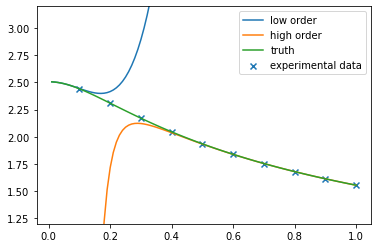

In [6]:
fig, ax_f = plt.subplots()
ax_f.plot(plot_g, m1_prediction[0].flatten(), label='low order')
ax_f.plot(plot_g, m2_prediction[0].flatten(), label='high order')
ax_f.plot(plot_g, true_output[0], label='truth')
ax_f.scatter(g,exp_data[0], marker='x', label='experimental data')
ax_f.set_ylim(1.2,3.2)
ax_f.legend()

#  2. Choose a Mixing method

In [7]:
mix_model = LM(m1, m2, g, exp_data[0], exp_data[1], method='step')

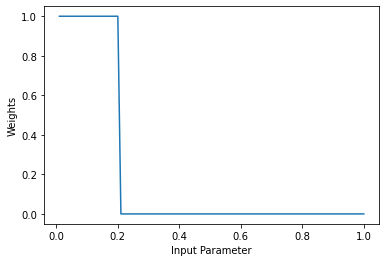

In [8]:
mix_model.plot_weights(np.array([0.2]),plot_g)

In [9]:
#mix_model.mix_loglikelihood_test([0.25])

In [10]:
mix_model.mix_loglikelihood(np.array([0.2]))

8.97310127442708

### BMM model output corresponding to the above input weights 

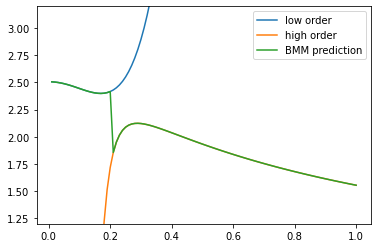

In [11]:
fig, ax = plt.subplots()
mix_prediction = mix_model.prediction(np.array([0.2]),plot_g)
ax.plot(plot_g, m1_prediction[0].flatten(), label='low order')
ax.plot(plot_g, m2_prediction[0].flatten(), label='high order')
ax.plot(plot_g, mix_prediction.flatten(), label='BMM prediction')
ax.set_ylim(1.2,3.2)
ax.legend()

### Log likelihood of the mixed model as a function of the Step mixing function parameter

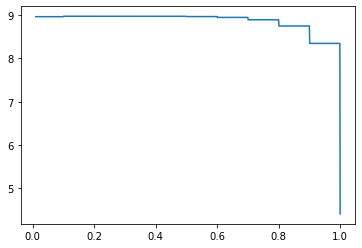

In [12]:
sw = np.linspace(0.01,1,1000)
likelihood = np.array([mix_model.mix_loglikelihood(np.array([s])) for s in sw]).flatten()
fig, ax = plt.subplots()
ax.plot(sw,likelihood,label='Mixture likelihood for step function')

# 3. Estimating the mixture weights

### Wrap the likelihood function in the mixed model to be calibrated

In [13]:
likelihood = likelihood_wrapper_for_bilby(mix_model)

### Get posterior samples using Bilby

16:31 bilby INFO    : Running for label 'step_mixing', output will be saved to 'outdir'
16:31 bilby INFO    : Search parameters:
16:31 bilby INFO    :   theta_0 = Uniform(minimum=0, maximum=1, name='theta_0', latex_label='theta_0', unit=None, boundary=None)
16:31 bilby INFO    : Single likelihood evaluation took 1.021e-04 s
16:31 bilby WARNING : Supplied argument 'npool' not an argument of 'Ptemcee', removing.
16:31 bilby WARNING : Supplied argument 'nburn' not an argument of 'Ptemcee', removing.
16:31 bilby INFO    : Using sampler Ptemcee with kwargs {'ntemps': 5, 'nwalkers': 100, 'Tmax': 10, 'betas': None, 'a': 2.0, 'adaptation_lag': 10000, 'adaptation_time': 100, 'random': None, 'adapt': False, 'swap_ratios': False}
16:31 bilby INFO    : Using convergence inputs: ConvergenceInputs(autocorr_c=5, autocorr_tol=50, autocorr_tau=1, gradient_tau=0.1, gradient_mean_log_posterior=0.1, Q_tol=1.02, safety=1, burn_in_nact=50, burn_in_fixed_discard=0, mean_logl_frac=0.01, thin_by_nact=0.5, nsam

1|0:00:00|nc:2.5e+03|a0:0.40-1.00|swp:1.00-1.00|n:nan<1000|t!nan(+nan,+nan)|q:inf|0.05ms/ev
2|0:00:00|nc:5.0e+03|a0:0.40-1.00|swp:1.00-1.00|n:nan<1000|t!nan(+nan,+nan)|q:inf|0.07ms/ev
3|0:00:00|nc:7.5e+03|a0:0.40-1.00|swp:1.00-1.00|n:nan<1000|t!nan(+nan,+nan)|q:inf|0.06ms/ev
4|0:00:00|nc:1.0e+04|a0:0.45-0.95|swp:1.00-1.00|n:nan<1000|t!nan(+nan,+nan)|q:inf|0.06ms/ev
5|0:00:00|nc:1.2e+04|a0:0.48-0.96|swp:1.00-1.00|n:nan<1000|t!nan(+nan,+nan)|q:inf|0.05ms/ev
6|0:00:00|nc:1.5e+04|a0:0.53-0.93|swp:1.00-1.00|n:nan<1000|t!nan(+nan,+nan)|q:inf|0.05ms/ev
7|0:00:00|nc:1.8e+04|a0:0.51-0.94|swp:1.00-1.00|n:nan<1000|t!nan(+nan,+nan)|q:inf|0.04ms/ev
8|0:00:01|nc:2.0e+04|a0:0.55-0.90|swp:1.00-1.00|n:nan<1000|t!nan(+nan,+nan)|q:inf|0.04ms/ev
9|0:00:01|nc:2.2e+04|a0:0.58-0.89|swp:1.00-1.00|n:nan<1000|t!nan(+nan,+nan)|q:inf|0.04ms/ev
10|0:00:01|nc:2.5e+04|a0:0.58-0.90|swp:1.00-1.00|n:nan<1000|t!nan(+nan,+nan)|q:inf|0.04ms/ev
11|0:00:01|nc:2.8e+04|a0:0.60-0.85|swp:1.00-1.00|n:nan<1000|t!nan(+nan,+nan)|q:

16:32 bilby INFO    : Finished sampling
16:32 bilby INFO    : Writing checkpoint and diagnostics
16:32 bilby INFO    : Finished writing checkpoint
16:32 bilby INFO    : Walkers plot failed with exception 'AxesSubplot' object is not iterable
16:32 bilby INFO    : Sampling time: 0:00:45.208528
16:32 bilby INFO    : Summary of results:
nsamples: 20200
ln_noise_evidence:    nan
ln_evidence:  3.970 +/-  0.000
ln_bayes_factor:    nan +/-  0.000



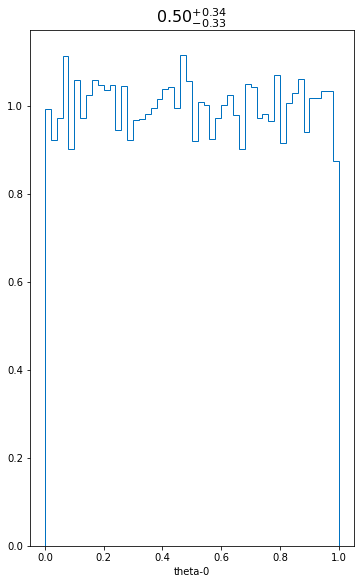

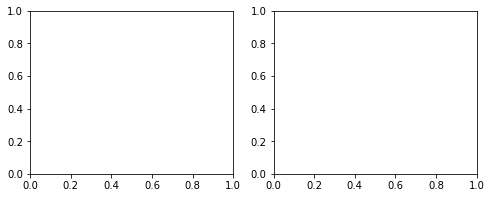

In [14]:
# A few simple setup steps
label = "step_mixing"
outdir = "outdir"

priors = dict(
   theta_0=bilby.core.prior.Uniform(0, 1, "theta_0")
)

# priors = dict(
#     theta_0=bilby.core.prior.Beta(2,2)
# )

# And run sampler
## If file exists, delete it ##
if os.path.exists(f'{outdir}/{label}'):
    os.remove(f'{outdir}/{label}')
    #shutil.rmtree(outdir)
result = bilby.run_sampler(
    likelihood,
    priors,
    label=label,
    outdir=outdir,
    sampler="ptemcee",
    ntemps=5,
    nwalkers=100,
    Tmax=10,
    nburn=200,
    nsamples=1000,  # This is the number of raw samples
    threads=5,
    )
result.plot_corner()


In [15]:
result.posterior['theta_0']

0        0.468087
1        0.009338
2        0.468397
3        0.086748
4        0.346489
           ...   
20195    0.314773
20196    0.885671
20197    0.905640
20198    0.689019
20199    0.928945
Name: theta_0, Length: 20200, dtype: float64

### trace plots

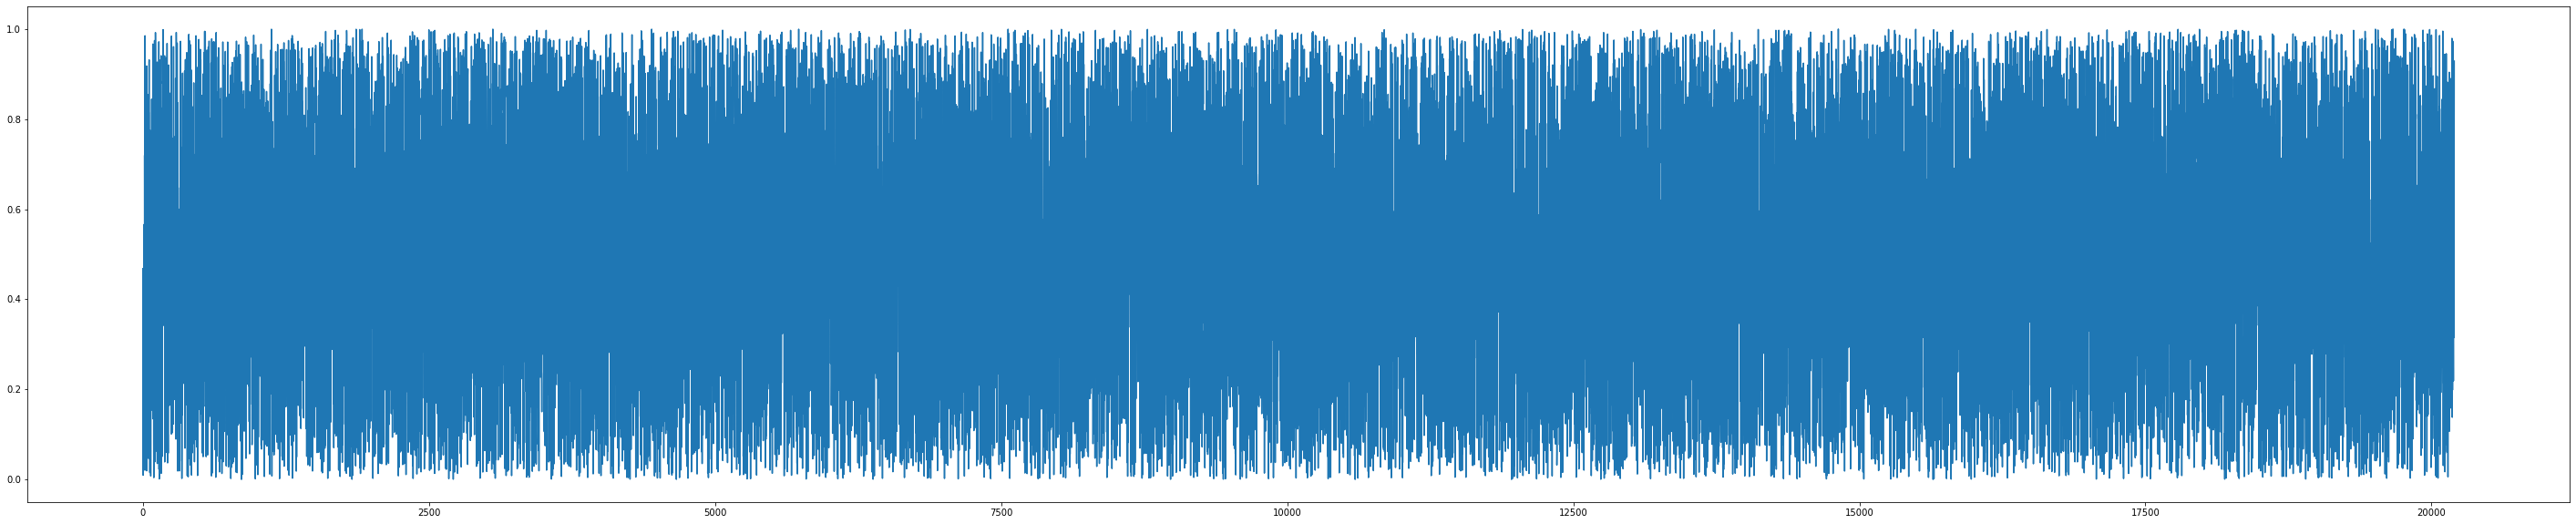

In [16]:

#sns.set_context(font_scale=100)
fig, ax = plt.subplots(figsize=(50,10))
ax.plot(result.posterior['theta_0'].values)

In [17]:
pos_weight_func = []
for sample in result.posterior['theta_0']:
    mean = mix_model.weights(np.array([sample]), plot_g)
    pos_weight_func.append(mean)
pos_weight_func = np.array(pos_weight_func).reshape(-1,len(plot_g))

In [18]:
per0,per5,per20,per80,per95,per100=np.percentile(pos_weight_func,[0,5,20,80,95,100], axis=0)

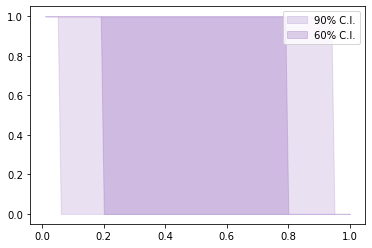

In [19]:
%matplotlib inline
fig, ax = plt.subplots()
ax.fill_between(plot_g,per5,per95,color=sns.color_palette()[4], alpha=0.2, label='90% C.I.')
ax.fill_between(plot_g,per20,per80, color=sns.color_palette()[4], alpha=0.3, label='60% C.I.')
ax.legend()
#ax.plot(plot_g, true_output[0], label='truth')
#ax.set_ylim(1.2,3.2)

### Predictions for the mixed model with posterior weights

In [20]:
pos_predictions = []
for sample in result.posterior['theta_0']:
    mean = mix_model.prediction(np.array([sample]),plot_g)
    pos_predictions.append(mean)
pos_predictions = np.array(pos_predictions).reshape(-1,len(plot_g))

In [21]:
pos_predictions.shape

(20200, 100)

In [22]:
per0,per5,per20,per80,per95,per100=np.percentile(pos_predictions,[0,5,20,80,95,100], axis=0)

(1.2, 3.2)

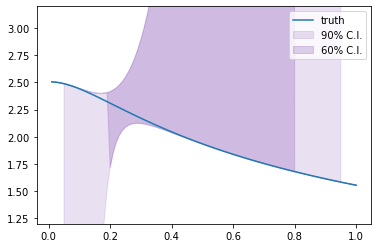

In [23]:
%matplotlib inline
fig, ax = plt.subplots()
ax.fill_between(plot_g,per5,per95,color=sns.color_palette()[4], alpha=0.2, label='90% C.I.')
ax.fill_between(plot_g,per20,per80, color=sns.color_palette()[4], alpha=0.3, label='60% C.I.')
ax.plot(plot_g, true_output[0], label='truth')
ax.legend()
ax.set_ylim(1.2,3.2)